<a href="https://colab.research.google.com/github/zzeeddd95/capstone-project/blob/master/Decisiontreeregressorapple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [243]:
from google.colab import files
apple = files.upload()

Saving AAPL.csv to AAPL (2).csv


In [280]:
apple = pd.read_csv('AAPL.csv')
apple.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-27,35.799999,36.270000,35.587143,36.192856,31.332062,166570600
1,2010-05-28,37.055714,37.057144,36.192856,36.697144,31.768623,203903700
2,2010-06-01,37.098572,37.991428,36.994286,37.261429,32.257130,219118200
3,2010-06-02,37.791428,37.828571,37.189999,37.707142,32.642975,172137000
4,2010-06-03,37.882858,37.935715,37.201427,37.588570,32.540325,162526700
5,2010-06-04,36.887142,37.414288,36.375713,36.565716,31.654835,189576100


In [281]:
apple.shape

(2516, 7)

In [282]:
#Filter out data to only obtain close price (independant variable)
apple = apple[['Close']]
apple

,Close
0,36.192856
1,36.697144
2,37.261429
3,37.707142
4,37.588570
...,...
2511,313.140015
2512,319.230011
2513,316.850006
2514,318.890015


In [284]:
#Create a variable to allow for predicting 'n days' into the future
future_out =365

In [285]:
#Create the dependant variable which will be shifted 'n' units up
apple['Prediction'] = apple[['Close']].shift(-future_out)
apple.tail()

,Close,Prediction
2511,313.140015,NaN
2512,319.230011,NaN
2513,316.850006,NaN
2514,318.890015,NaN
2515,316.730011,NaN


In [286]:
#create independant data set by converting the dataframe to a numpy array
appledfx = np.array(apple.drop(['Prediction'],1))
#Renove the last 'n' rows
appledfx = appledfx[:-future_out] #therefore for every column, all of the rows will be displayed - future out
appledfx

array([[ 36.192856],
       [ 36.697144],
       [ 37.261429],
       ...,
       [168.490005],
       [169.600006],
       [168.630005]])

In [287]:
#creat dependant dataset (prediction), all values including any Nan's
appledfy = np.array(apple['Prediction'])
#Filter this data by obtaining all values except the last 'n' rows
appledfy = appledfy[:-future_out]
print(appledfy)

[ 57.177143  57.104286  58.032856 ... 316.850006 318.890015 316.730011]


In [303]:
#split data into 90% training and 10%testing
appledfx_train , appledfx_test, appledfy_train, appledfy_test = train_test_split(appledfx, appledfy, test_size = 0.10)

In [304]:
#Create and train the decision tree regressor model
tree = DecisionTreeRegressor().fit(appledfx_train,appledfy_train)

In [305]:
#test model accuracy via score which returns the coefficient of determination (R^2) of prediction
treeconfidence = tree.score(appledfx_test, appledfy_test)
print("Decision tree regressor confidence", treeconfidence)

Decision tree regressor confidence 0.7259276515756122


In [306]:
#set apple_forecast = to the last 365 rows of original dataset from close price column
apple_forecast = np.array(apple.drop(['Prediction'],1))[-future_out:]
print(apple_forecast)


[[169.100006]
 [170.949997]
 [165.479996]
 [163.940002]
 [166.070007]
 [160.889999]
 [156.830002]
 [150.729996]
 [146.830002]
 [157.169998]
 [156.149994]
 [156.229996]
 [157.740005]
 [157.919998]
 [142.190002]
 [148.259995]
 [147.929993]
 [150.75    ]
 [153.309998]
 [153.800003]
 [152.289993]
 [150.      ]
 [153.070007]
 [154.940002]
 [155.860001]
 [156.820007]
 [153.300003]
 [153.919998]
 [152.699997]
 [157.759995]
 [156.300003]
 [154.679993]
 [165.25    ]
 [166.440002]
 [166.520004]
 [171.25    ]
 [174.179993]
 [174.240005]
 [170.940002]
 [170.410004]
 [169.429993]
 [170.889999]
 [170.179993]
 [170.800003]
 [170.419998]
 [170.929993]
 [172.029999]
 [171.059998]
 [172.970001]
 [174.229996]
 [174.330002]
 [174.869995]
 [173.149994]
 [174.970001]
 [175.850006]
 [175.529999]
 [174.520004]
 [172.5     ]
 [172.910004]
 [178.899994]
 [180.910004]
 [181.710007]
 [183.729996]
 [186.119995]
 [188.020004]
 [186.529999]
 [188.160004]
 [195.089996]
 [191.050003]
 [188.740005]
 [186.789993]
 [188.

In [307]:
#Print decision tree predicted values for upcoming 'n' days
treeprediction = tree.predict(apple_forecast)
print(treeprediction)

[209.149994  189.        230.089996  170.800003  218.960007  174.330002
 189.949997  153.309998  222.110001  153.070007  200.100006  197.
 166.440002  166.440002  201.760002  146.830002  146.830002  153.309998
 183.729996  222.220001  148.259995  150.        213.300003  193.529999
 188.740005  189.949997  183.729996  192.229996  147.929993  166.440002
 197.        186.529999  220.820007  216.699997  216.699997  205.699997
 217.679993  311.410004  189.        208.479996  190.919998  189.
 208.479996  189.        208.479996  189.        204.020004  189.
 213.039993  201.240005  198.580002  207.160004  202.899994  197.179993
 219.889999  199.039993  182.539993  200.7649995 213.039993  203.429993
 307.649994  212.460007  234.369995  236.410004  280.410004  264.160004
 250.3550035 298.390015  309.630005  267.839996  293.799988  257.5
 267.839996  310.329987  284.269989  278.579987  298.390015  298.390015
 298.390015  312.679993  312.679993  312.679993  312.679993  312.679993
 312.679993  31

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


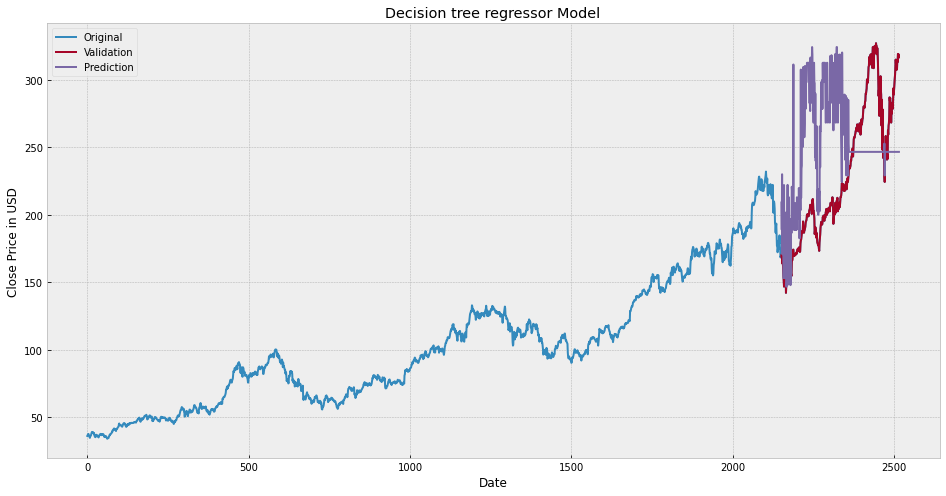

In [308]:
prediction = treeprediction
valid = apple[appledfx.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize = (16,8))
plt.title ('Decision tree regressor Model')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.plot(apple['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Original','Validation','Prediction'])
plt.show()